In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

In [14]:
with open("winequality-red.csv", "r") as file:
    data = file.read()

data = data.replace(";", ",")

with open("winequality-red_comma.csv", "w") as file:
    file.write(data)

In [15]:
df=pd.read_csv("winequality-red_comma.csv")

In [17]:

df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [18]:
majority=df[df["quality"]==5]
minority=df[df["quality"]==3]

In [19]:
upsampled_minority=resample(minority,replace=True,n_samples=len(majority),random_state=42)

In [28]:
df_upsampled = pd.concat([majority, upsampled_minority,df[df["quality"]==7],df[df["quality"]==8],df[df["quality"]==4],df[df["quality"]==6]])

In [29]:
df_upsampled["quality"].value_counts()

quality
5    681
3    681
6    638
7    199
4     53
8     18
Name: count, dtype: int64

In [27]:
!pip install matplotlib

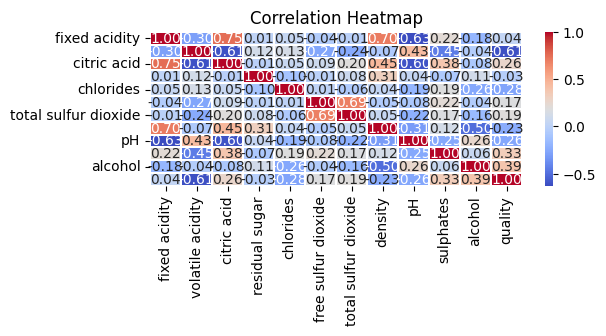

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.DataFrame(df_upsampled)

plt.figure(figsize=(6,2))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3)
plt.title("Correlation Heatmap")
plt.show()

In [39]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296962,0.747119,0.014156,0.045570,-0.043869,-0.008117,0.704993,-0.629210,0.223491,-0.180631,0.036386
volatile acidity,-0.296962,1.000000,-0.606825,0.120958,0.134432,-0.270229,-0.244230,-0.067154,0.434576,-0.450316,-0.039133,-0.612732
citric acid,0.747119,-0.606825,1.000000,-0.007850,0.052096,0.085430,0.195053,0.452736,-0.601555,0.377948,-0.076823,0.262797
residual sugar,0.014156,0.120958,-0.007850,1.000000,-0.101351,-0.005500,0.077323,0.307222,0.041442,-0.070135,0.110747,-0.029696
chlorides,0.045570,0.134432,0.052096,-0.101351,1.000000,0.011407,-0.059877,0.036110,-0.189379,0.185056,-0.256799,-0.277457
free sulfur dioxide,-0.043869,-0.270229,0.085430,-0.005500,0.011407,1.000000,0.689567,-0.053839,-0.076692,0.221490,-0.043730,0.173894
total sulfur dioxide,-0.008117,-0.244230,0.195053,0.077323,-0.059877,0.689567,1.000000,0.051145,-0.216289,0.167966,-0.161556,0.194737
density,0.704993,-0.067154,0.452736,0.307222,0.036110,-0.053839,0.051145,1.000000,-0.311784,0.122903,-0.503769,-0.232997
pH,-0.629210,0.434576,-0.601555,0.041442,-0.189379,-0.076692,-0.216289,-0.311784,1.000000,-0.250414,0.261195,-0.260616
sulphates,0.223491,-0.450316,0.377948,-0.070135,0.185056,0.221490,0.167966,0.122903,-0.250414,1.000000,0.064282,0.332113


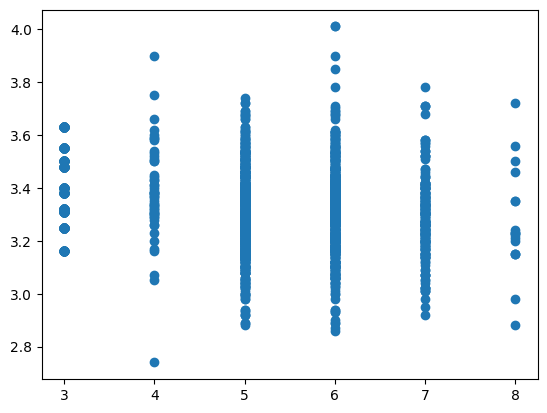

In [44]:
plt.scatter(df["quality"],df["pH"])
plt.show()

In [46]:
X=df.drop("quality",axis=1)
y=df["quality"]

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
model=RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_test, y_pred))


1.5388523083733703


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [9]:
def check_int(x):
    if not isinstance(x, int):
        raise TypeError("Must be in int form")

try:
    for i in range(2):
        x = input("Enter an integer: ")
        if x == 0:
            raise ZeroDivisionError("Must be non-zero")
        check_int(int(x))

except ZeroDivisionError as e:
    print(e)
except TypeError as e:
    print(e)



0.793652943771902


c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


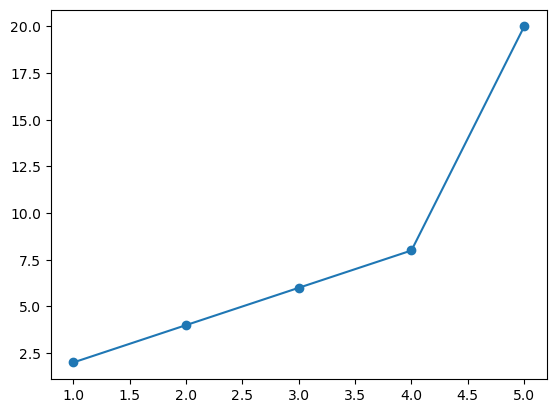

In [7]:
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
x=np.array([[1],[2],[3],[4],[5]])
y=np.array([2,4,6,8,20])
model=SGDRegressor().fit(X,y)
y_predd=model.predict(x)
print(r2_score(y,y_predd))
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

# Fake data
X = np.arange(10).reshape(-1,1)
y = np.array([1,2,4,8,16,32,64,128,256,512])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Underfitting: simple linear model ---
lin = LinearRegression()
lin.fit(X_train, y_train)
print("Train score (underfit):", lin.score(X_train, y_train))
print("Test score (underfit):", lin.score(X_test, y_test))

Train score (underfit): 0.6298514706067755
Test score (underfit): 0.6396378029753556


In [9]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lin_poly = LinearRegression()
lin_poly.fit(X_poly_train, y_train)
print("Train score (better fit):", lin_poly.score(X_poly_train, y_train))
print("Test score (better fit):", lin_poly.score(X_poly_test, y_test))

Train score (better fit): 0.9963668525276167
Test score (better fit): 0.9536423201096911


In [12]:
import time
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
s=time.time()
r1=LinearRegression()
r1.fit(X,y)
e=time.time()
print(r1.coef_,r1.intercept_)
print(f"{e-s:.5f}")
s=time.time()
sgd=SGDRegressor()
sgd.fit(X,y)
e=time.time()
print(sgd.coef_,sgd.intercept_)
print(f"{e-s:.5f}")

[[2.96846751]] [4.22215108]
0.00113
[3.27404949] [3.87819757]
0.00224


c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
import pandas as pd
import seaborn as sns
d=sns.load_dataset("titanic")
d.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
from sklearn.preprocessing import OneHotEncoder
m=OneHotEncoder()

encoded_alive=m.fit_transform(d[["alive"]]).toarray()
encoded_sex=m.fit_transform(d[["sex"]]).toarray()
d["encoded_alive"] = encoded_alive[:, 1] 



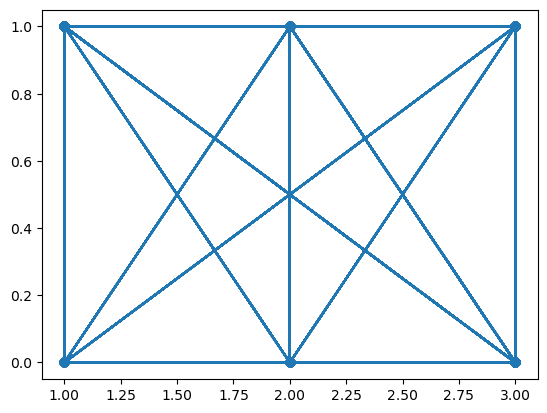

In [60]:
plt.scatter(d["pclass"],d["encoded_alive"])
plt.plot(d["pclass"],d["encoded_alive"])
plt.show()

In [61]:
d[["age","encoded_alive"]].corr()


,age,encoded_alive
age,1.000000,-0.077221
encoded_alive,-0.077221,1.000000


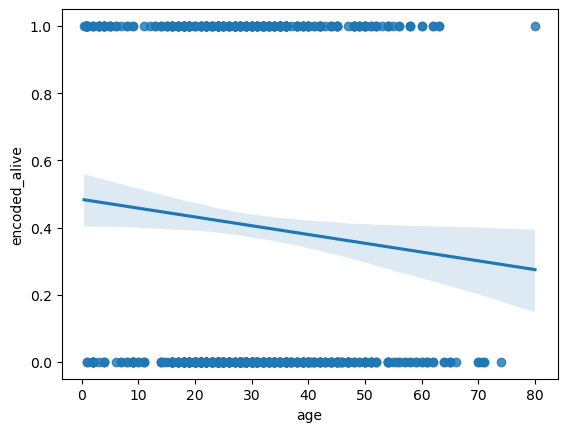

In [63]:
sns.regplot(x=d["age"],y=d["encoded_alive"])
plt.show()

In [64]:
dd=pd.read_csv("winequality-red_comma.csv")
dd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
dd.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='fixed acidity', ylabel='quality'>

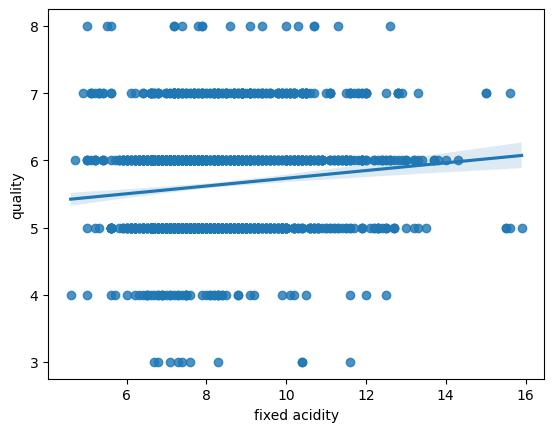

In [68]:
sns.regplot(x=dd["fixed acidity"],y=dd["quality"])

In [69]:
dd=pd.read_csv("economic_index.csv")
dd.tail()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
19,19,2016,5,1.75,6.1,866
20,20,2016,4,1.75,5.9,876
21,21,2016,3,1.75,6.2,822
22,22,2016,2,1.75,6.2,704
23,23,2016,1,1.75,6.1,719


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

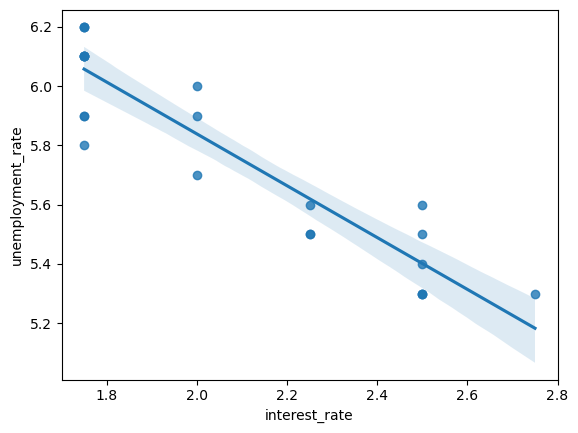

In [70]:
sns.regplot(x=dd["interest_rate"],y=dd["unemployment_rate"])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
df["target"]=0

In [8]:
df.loc[122:,"target"]=1
df.loc[:122,"target"]=0
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,target
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
df.isnull().sum()

Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
target         0
dtype: int64

In [ ]:
df=df.dropna().reset_index(drop=True) ##drops any NaN rows

In [11]:
df.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,target
122,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
df=df.drop(index=122).reset_index(drop=True)
df[["target"]]=df[["target"]].astype(int)

In [13]:
df.loc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,target
122,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
df.columns.str.strip()
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'target'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1    RH          243 non-null    object
 2    Ws          243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    object
 11  target       243 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 22.9+ KB


In [16]:
d=[features for features in df.columns if df[features].dtype=="O"]
for i in d:
    if i!="Classes":
        df[i]=df[i].astype(float)
df.head()

ValueError: could not convert string to float: 'not fire   '

In [17]:
df2=df
df2.columns=df2.columns.str.strip()


In [18]:
df2["Classes"]

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [19]:
df2["Classes"]=np.where(df2["Classes"].str.contains("not fire"),0,1)

In [20]:
df2["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [1]:
import useful as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [186]:
##x,y=make_classification(n_samples=1000,n_features=10,n_informative=10,n_redundant=0,n_classes=2,random_state=42)
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)
model=LogisticRegression()


In [187]:
model.fit(x_train,y_train)


LogisticRegression()

In [188]:
y_pred=model.predict(x_test)
from sklearn.metrics import f1_score

In [189]:
print(f1_score(y_test,y_pred))

0.922077922077922


In [190]:
pd.value_counts(y)

C:\Users\user\AppData\Local\Temp\ipykernel_22800\3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


1    503
0    497
Name: count, dtype: int64

In [191]:
y_pred_train=model.predict(x_train)
print(f1_score(y_train,y_pred_train))

0.9185185185185185


In [185]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.utils import resample
from collections import Counter

In [3]:
x,y=make_classification(n_samples=1000,n_features=5,n_classes=2,weights=[0.80],random_state=0)

In [6]:
Counter(y)

Counter({np.int64(0): 799, np.int64(1): 201})

In [7]:
x

array([[-0.74465643, -1.00210767, -0.22980587,  0.83437137,  0.25011391],
       [-1.16416489, -1.48719156, -0.39542409,  1.20697496, -0.40435222],
       [-0.9404814 , -1.21929183, -0.31132512,  0.99695633, -2.00512543],
       ...,
       [ 0.37731902, -0.40847739,  0.5333356 ,  0.70084456, -1.17119034],
       [ 0.21544248, -1.7187442 ,  0.98043238,  2.22189722,  1.27404454],
       [-1.27267099, -1.35409935, -0.55590584,  0.98626975, -0.57525599]])

In [16]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,20,50,80,100] for y in [1,10,20,50,80,100]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [14]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [17]:
grid.fit(x_train,y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 20}, {0: 1, 1: 50},
                                          {0: 1, 1: 80}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 20}, {0: 10, 1: 50},
                                          {0: 10, 1: 80}, {0: 10, 1: 100},
                                          {0: 20, 1: 1}, {0: 20, 1: 10},
                                          {0: 20, 1: 20}, {0: 20, 1: 50},
                                          {0: 20, 1: 80}, {0: 20, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 20}, {0: 50, 1: 50},
                                          {0: 50, 1: 80}, {0: 50, 1: 100},
                                          {0: 80, 1: 1}, {0: 80, 1: 10},
                                          {0: 80, 1: 20}, {0: 80, 1: 50},
                                          {0: 80, 1: 80}, {0: 80, 1: 100}, ...],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [18]:
y_pred=grid.predict(x_test)

In [19]:
print(accuracy_score(y_test,y_pred))

0.95


In [20]:
grid.best_params_

{'C': 10, 'class_weight': {0: 10, 1: 10}, 'penalty': 'l1', 'solver': 'saga'}

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
dummy=DummyClassifier(strategy="most_frequent")
dummy.fit(x_train,y_train)
y_pr=dummy.predict(x_test)
print(accuracy_score(y_test,y_pr))

0.7933333333333333


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

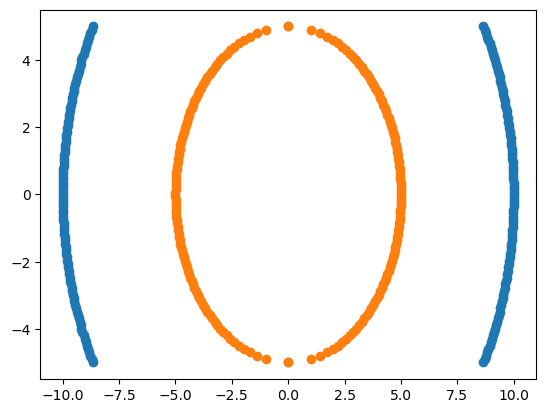

In [2]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

AttributeError: 'DataFrame' object has no attribute 'append'

In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(
    n_samples=1000,n_features=3,n_redundant=1,n_classes=2,random_state=42
)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
kn=KNeighborsClassifier()

In [6]:
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)

In [7]:
accuracy_score(y_test,y_pred)

0.91

In [12]:
k=[i for i in range(11)]
param_grid={
    'n_neighbors':k
}
gr=GridSearchCV(KNeighborsClassifier(),param_grid)

In [13]:
gr.fit(x_train,y_train)
y_p=gr.predict(x_test)
accuracy_score(y_test,y_p)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 55.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    valida

0.92

In [14]:
gr.best_params_

{'n_neighbors': 7}

In [3]:
from sklearn.svm import SVR
svr=SVR()
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df=pd.DataFrame(df)

In [6]:
x=pd.concat([df.iloc[:,2],df.iloc[:,0]],axis=1)
y=df.iloc[:,1]

In [7]:
x.head()

,sex,total_bill
0,Female,16.99
1,Male,10.34
2,Male,21.01
3,Male,23.68
4,Female,24.59


In [8]:
df["sex"]=np.where(df["sex"].str.contains("Male"),1,0)

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [10]:
x.sex=df.sex
x["mult"]=x["sex"]*x["total_bill"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test,y_pred)

0.4355777354220899

In [14]:
x.head()

,sex,total_bill,mult
0,0,16.99,0.00
1,1,10.34,10.34
2,1,21.01,21.01
3,1,23.68,23.68
4,0,24.59,0.00


In [34]:
param_grid={
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear', 'poly', 'rbf']
}
gr = RandomizedSearchCV(SVR(), param_distributions=param_grid, n_iter=10, cv=5, verbose=2)
gr.fit(x_train,y_train)
y_pred=gr.predict(x_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s


KeyboardInterrupt: 

In [15]:
r2_score(y_test,y_pred)

0.3177881903255346

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=model.predict(x_test)

In [19]:
r2_score(y_test,y_pred)

0.3788915196987236

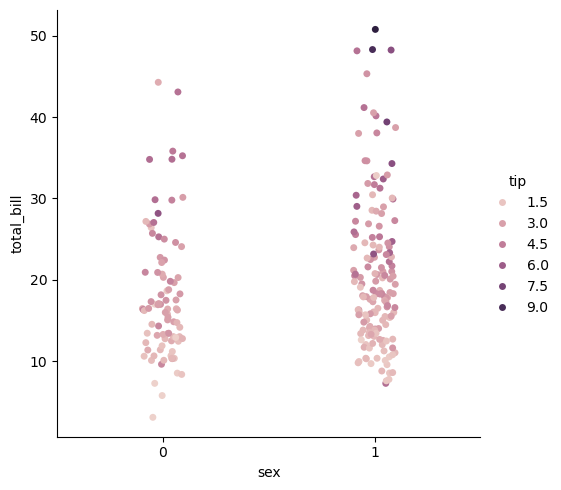

In [28]:
sns.catplot(x=x.sex,y=x.total_bill,hue=y)

In [46]:
x.head()

,sex,total_bill
0,Female,16.99
1,Male,10.34
2,Male,21.01
3,Male,23.68
4,Female,24.59


In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
poly=PolynomialFeatures(degree=1)
x_train=poly.fit_transform(x_train)
x_test=poly.transform(x_test)

In [26]:
model=LinearRegression()

In [27]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

MemoryError: Unable to allocate 14.2 GiB for an array with shape (146, 13019909) and data type float64

In [ ]:
r2_score(y_test,y_pred)

0.37302864228111654

In [ ]:
#Sometimes you just have to accept

In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.tip=df.tip.astype(int)
df.total_bill=df.total_bill.astype(int)

In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    int64   
 1   tip         244 non-null    int64   
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), int64(3)
memory usage: 7.4 KB


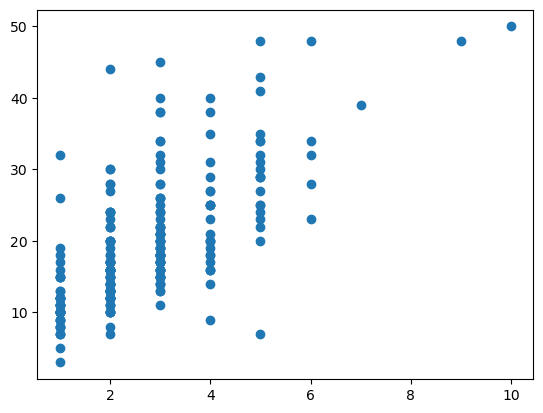

In [12]:
plt.scatter(x=df.tip,y=df.total_bill)
plt.show()

In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.2 MB/s eta 0:00:46
    --------------------------------------- 0.8/56.8 MB 1.1 MB/s eta 0:00:51
    --------------------------------------- 1.0/56.8 MB 1.3 MB/s eta 0:00:44
    --------------------------------------- 1.3/56.8 MB 1.1 MB/s eta 0:00:51
   - -------------------------------------- 1.6/56.8 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 1.8/56.8 MB 1.2 MB/s eta 0:00:46
   - -------------------------------------- 2.1/56.8 MB 1.2 MB/s eta 0:00:46
   - -------------------------------------- 2.4/56.8 MB 1.2 MB/s eta 0:00:45
   - -------------------------------------- 2.6/56.8 MB 1.2 MB/s eta 0:00:45
   -- ---------------------

In [2]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00


In [3]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 734.7 kB/s eta 0:02:19
   ---------------------------------------- 0.8/102.4 MB 908.2 kB/s eta 0:01:52
   ---------------------------------------- 1.0/102.4 MB 1.0 MB/s eta 0:01:39
    --------------------------------------- 1.3/102.4 MB 1.1 MB/s eta 0:01:35
    --------------------------------------- 1.6/102.4 MB 1.1 MB/s eta 0:01:29
    --------------------------------------- 1.8/102.4 MB 1.2 MB/s eta 0:01:25
    --------------------------------------- 2.4/102.4 MB 1.3 MB/s eta 0:01:20
   - -------------------------------------- 2.6/102.4 MB 1.3 MB/s eta 0:01:19
   - -------------------------------------- 2.6/102.4 MB 1.3 MB/s eta 0:01:19
   - -----

   -------------- ------------------------ 38.5/102.4 MB 436.5 kB/s eta 0:02:27
   -------------- ------------------------ 38.5/102.4 MB 436.5 kB/s eta 0:02:27
   -------------- ------------------------ 38.5/102.4 MB 436.5 kB/s eta 0:02:27
   -------------- ------------------------ 38.8/102.4 MB 455.2 kB/s eta 0:02:20
   -------------- ------------------------ 38.8/102.4 MB 455.2 kB/s eta 0:02:20
   -------------- ------------------------ 39.1/102.4 MB 457.2 kB/s eta 0:02:19
   -------------- ------------------------ 39.1/102.4 MB 457.2 kB/s eta 0:02:19
   -------------- ------------------------ 39.3/102.4 MB 459.2 kB/s eta 0:02:18
   -------------- ------------------------ 39.3/102.4 MB 459.2 kB/s eta 0:02:18
   -------------- ------------------------ 39.3/102.4 MB 459.2 kB/s eta 0:02:18
   --------------- ----------------------- 39.6/102.4 MB 458.9 kB/s eta 0:02:17
   --------------- ----------------------- 39.6/102.4 MB 458.9 kB/s eta 0:02:17
   --------------- ---------------------

In [1]:
from sklearn.datasets import load_iris
from useful import correlation
import numpy as np
import pandas as pd
x,y=load_iris(return_X_y=True)

In [2]:
df=pd.DataFrame(x)

In [3]:
df.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [4]:
k=correlation(df,0.5)

In [5]:
k

{2, 3}

In [1]:
from sklearn.datasets import load_diabetes
from useful import correlation
import numpy as np
import pandas as pd

In [2]:
dataset=load_diabetes()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [25]:
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [28]:
x=df.drop('sex',axis=1)
y=df['sex']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [41]:
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


In [42]:
from sklearn.model_selection import train_test_split


In [43]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [44]:
y_pred=sgd.predict(x_test)

In [45]:
from sklearn.metrics import r2_score,classification_report

In [46]:
r2_score(y_test,y_pred)

0.211711154610293

In [47]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [49]:
regs={
    "XG":XGBRegressor(),
    "SVR":SVR(),
    "RNDM":RandomForestRegressor()
}
for i in range(len(list(regs))):
    model=list(regs.values())[i]
    model.fit(x_train,y_train)

    y_pred=model.predict(x_test)

    
    print(r2_score(y_test,y_pred))

-0.3855414427152726
-0.006617647058823062
-0.047528039215686047


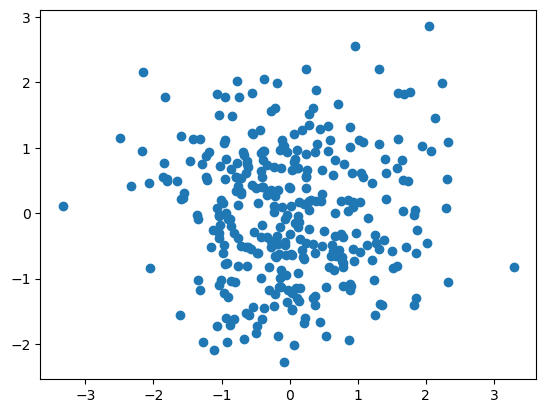

In [55]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1])

In [68]:

dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
from sklearn.datasets import load_diabetes
from useful import correlation
import numpy as np
import pandas as pd
dataset=load_diabetes()
dg=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
dg

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
y=dataset['target']

In [10]:
x=dg

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
regs={
    "XG":XGBRegressor(),
    "SVR":SVR(kernel='rbf'),
    "RNDM":RandomForestRegressor(random_state=42),
    "KNN":KNeighborsRegressor(),
    "LGBM":LGBMRegressor(),
    "RIDGE":Ridge(),
    "Linear":LinearRegression(),
    "DT":DecisionTreeRegressor(criterion='poisson')
}
for i in range(len(list(regs))):
    model=list(regs.values())[i]
    model.fit(x_train,y_train)

    y_pred=model.predict(x_test)

    
    print(r2_score(y_test,y_pred))

0.3914071287371097
0.18386053976766303
0.45547329638673595
0.4312596270718887
0.3815690270766926
0.48589618270899815
0.4849058889476754
-0.07778881920188607


c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Handling Outliers

In [3]:
x,y=make_circles(n_samples=750,factor=0.3,noise=0.15)

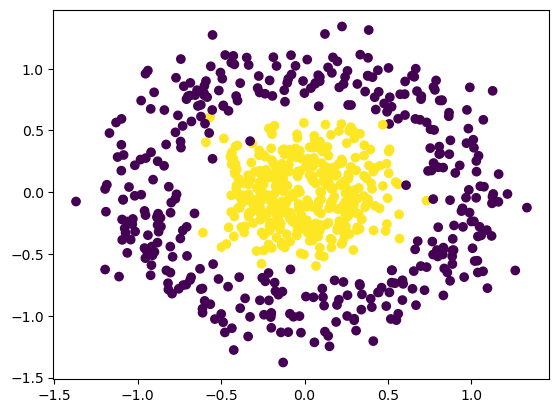

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [13]:
lof=LocalOutlierFactor()
k=lof.fit_predict(x)

In [14]:
t=np.where(k<0)

In [15]:
t

(array([ 46, 464, 481, 483]),)

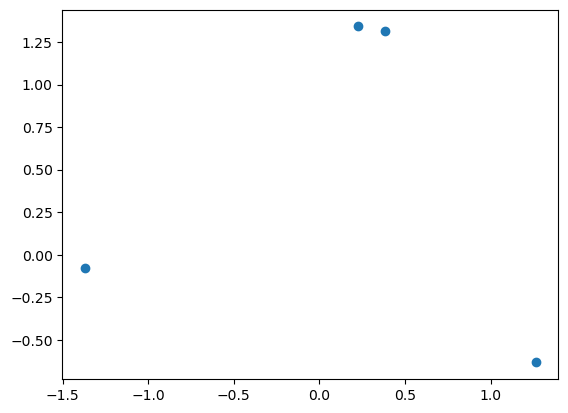

In [21]:
plt.scatter(x[t,0],x[t,1])
plt.show()

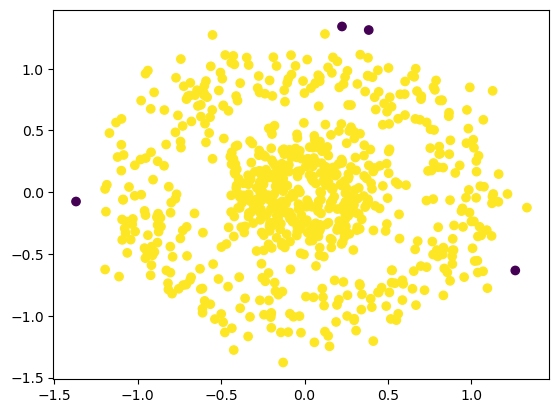

In [22]:
plt.scatter(x[:,0],x[:,1],c=k)

In [1]:
!pip install nltk

In [2]:
!pip install spacy

  Using cached spacy-3.8.7-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp313-cp313-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp313-cp313-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.10-cp313-cp313-win_amd64.whl.metadata (2.5 kB)
  Using cached thinc-8.3.6-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp313-cp313-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached blis-1.3.0-cp313-cp313-win_amd64.whl.metadata (7.6 kB)
  Using cached confection-0.

In [7]:
from nltk.tokenize import word_tokenize


In [10]:
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')  # Download tokenizer model

corpus = "salam. Netersiz dostlar"
print(word_tokenize(corpus))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\user/nltk_data'
    - 'c:\\Users\\user\\anaconda3\\nltk_data'
    - 'c:\\Users\\user\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\user\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\user\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [11]:
import nltk
nltk.download('punkt', download_dir=r"C:\Users\user\nltk_data")


[nltk_data] Downloading package punkt to C:\Users\user\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
import nltk
nltk.data.path.append(r"C:\Users\user\nltk_data")

from nltk.tokenize import sent_tokenize, word_tokenize,TreebankWordTokenizer

corpus = "Salam. Necəsiz dostlar?"
word_tokenize(corpus)


['Salam', '.', 'Necəsiz', 'dostlar', '?']

In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
tt=TreebankWordTokenizer()
tt.tokenize(corpus)

['Salam.', 'Necəsiz', 'dostlar', '?']